In [57]:
# Importar as bibliotecas necessárias para solucionar o probema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar a base de dados
df= '/content/drive/MyDrive/data/df_merged_tratado.parquet'

In [59]:
# rodando localmente
df = 'data/df_merged_tratado.parquet'

In [60]:
try:
  df = pd.read_parquet(df)
  print("carregou!")
except FileNotFoundError:
  print(f"nao achou {df}")
except Exception as e:
  print(f"erro {e}")

carregou!


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877455 entries, 0 to 4877454
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ds_centro_custo            category      
 1   ds_estabelecimento         category      
 2   cd_acao                    int64         
 3   nr_atendimento             int64         
 4   dt_movimento_estoque       datetime64[ns]
 5   ds_local_estoque           category      
 6   cd_conta_contabil          object        
 7   ds_operacao                category      
 8   dt_referencia              datetime64[ns]
 9   qt_estoque                 float64       
 10  vl_estoque                 float64       
 11  vl_movimento               float64       
 12  vl_consumo                 float64       
 13  qt_consumo                 float64       
 14  id_item                    int64         
 15  ds_material_hospital       category      
 16  ie_ativo                   bool     

In [62]:
df.head()

,ds_centro_custo,ds_estabelecimento,cd_acao,nr_atendimento,dt_movimento_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,dt_referencia,qt_estoque,...,ds_material_hospital,ie_ativo,ds_classe_material,ds_subgrupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
0,Posto Carambeí,Laboratorio Unimed Ponta Grossa,1,0,2024-10-17 15:46:02,Posto Carambeí,71111911113905.0,Consumo,2024-10-01,1.0,...,"Pilha Pequena ""AA"" Alcalina",True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.0,2007-08-31 09:05:52,Unidade,Unidade,Unidade
1,SADT - RADIOLOGIA,Hospital Geral Unimed,1,0,2024-10-17 13:49:55,Almoxarifado,71111911113905.0,Consumo,2024-10-01,3.0,...,Papel Sulfite A4 Branco 210x297mm Pcte com 500...,True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.0,2006-10-23 09:02:51,Pacote,Pacote,Pacote
2,Coleta Ambulatorial,Laboratorio Unimed Ponta Grossa,1,0,2024-10-09 10:29:11,Almoxarifado Laboratório,71111911113103.0,Consumo,2024-10-01,500.0,...,Stopper Cor da pele,True,Curativos,Curativos,Materiais Hospitalares,1.0,2009-06-10 18:23:32,Peça,Peça,Peça
3,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-17 14:04:47,Almoxarifado,71111911113905.0,Consumo,2024-10-01,20.0,...,"Folha A4 com 8 etiquetas tamanho 7,5x10 cm Quí...",True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.0,2019-06-24 15:40:59,Folha,Folha,Folha
4,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-17 14:04:47,Almoxarifado,71111911113905.0,Consumo,2024-10-01,1.0,...,Pincel Azul p/ Quadro Branco,True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.0,2000-08-23 16:21:57,Unidade,Unidade,Unidade


In [63]:
df['ds_operacao'].value_counts()

ds_operacao
Execução Prescrição                     4468447
Devolução Paciente                       276143
Consumo                                  124881
Quebras e Contaminações                    2399
Produtos vencidos                          2342
Perdas e Quebras                           1739
Quebras/Contaminação Med Controlados        880
Perdas por estabilidade                     230
Sobras por estabilidade                     222
Medicamentos Controlados Vencidos           121
Saída por troca comercial                    42
Doações - saída                               9
Name: count, dtype: int64

### fazer recorte por ds_operacao: quebras e perdas, produtos vencidos, medicamentos controlados vencidos, perdas por estabilidade, quebras/contaminação med controlados

In [64]:
operacoes_desperdicio = [
    'Quebras e Contaminações',
    'Perdas e Quebras',
    'Produtos vencidos',
    'Medicamentos Controlados Vencidos',
    'Perdas por estabilidade',
    'Quebras/Contaminação Med Controlados'
]

df_desperdicio = df[df['ds_operacao'].isin(operacoes_desperdicio)].copy()
df_desperdicio.head()

,ds_centro_custo,ds_estabelecimento,cd_acao,nr_atendimento,dt_movimento_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,dt_referencia,qt_estoque,...,ds_material_hospital,ie_ativo,ds_classe_material,ds_subgrupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
607824,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-10-16 11:36:16,CAF,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,...,Acetazolamida: 250mg - comprimido,True,Diuréticos,Sistema Cardiovascular,Medicamentos,1.0,1997-11-05 16:16:33,Comprimido,Comprimido,Comprimido
607825,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-09 16:32:51,Farmacia,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,...,DipiRONA: 500mg - comprimido,True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.0,1997-10-03 14:55:30,Comprimido,Comprimido,Comprimido
607826,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:41:46,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,...,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.0,1997-10-03 14:50:24,Ampola,Ampola,Ampola
607827,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:42:55,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,...,"Tramadol: 50mg/mL - sol. inj., amp (1mL)",True,Analgésicos Narcóticos,Sistema Nervoso,Medicamentos,1.0,1998-02-24 13:06:44,Ampola,Ampola,Ampola
607828,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-09-30 11:14:41,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-09-01,1.0,...,"Fenobarbital: 100mg/mL- sol. inj., amp (2mL)",True,Anticonvulsivantes,Sistema Nervoso,Medicamentos,1.0,1997-11-11 18:43:35,Ampola,Ampola,Ampola


### fazer colunas novas: mes, ano, quantidade de tempo no estoque, valor unitario=vl_movimento/qt_consumo

In [65]:
df_desperdicio['mes'] = df_desperdicio['dt_referencia'].dt.month
df_desperdicio['ano'] = df_desperdicio['dt_referencia'].dt.year

display(df_desperdicio[['dt_referencia', 'mes', 'ano']].head())

,dt_referencia,mes,ano
607824,2024-10-01,10,2024
607825,2024-10-01,10,2024
607826,2024-10-01,10,2024
607827,2024-10-01,10,2024
607828,2024-09-01,9,2024


In [66]:
df_desperdicio['valor_unitario'] = df_desperdicio['vl_estoque'] / df_desperdicio['qt_estoque']
df_desperdicio['valor_unitario'] = df_desperdicio['valor_unitario'].replace([np.inf, -np.inf], np.nan) # Handle division by zero resulting in inf



display(df_desperdicio[['vl_estoque', 'qt_estoque', 'valor_unitario', 'dt_movimento_estoque', 'dt_cadastramento']].head())

,vl_estoque,qt_estoque,valor_unitario,dt_movimento_estoque,dt_cadastramento
607824,0.55,1.0,0.55,2024-10-16 11:36:16,1997-11-05 16:16:33
607825,0.15,1.0,0.15,2024-10-09 16:32:51,1997-10-03 14:55:30
607826,0.84,1.0,0.84,2024-10-12 10:41:46,1997-10-03 14:50:24
607827,1.08,1.0,1.08,2024-10-12 10:42:55,1998-02-24 13:06:44
607828,2.20,1.0,2.20,2024-09-30 11:14:41,1997-11-11 18:43:35


In [67]:
pd.set_option('display.max_columns', None)
print("Configuração para exibir todas as colunas ativada.")

Configuração para exibir todas as colunas ativada.


In [68]:

display(df_desperdicio.head())

,ds_centro_custo,ds_estabelecimento,cd_acao,nr_atendimento,dt_movimento_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item,ds_material_hospital,ie_ativo,ds_classe_material,ds_subgrupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo,mes,ano,valor_unitario
607824,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-10-16 11:36:16,CAF,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,0.55,0.55,0.0,0.0,69102996,Acetazolamida: 250mg - comprimido,True,Diuréticos,Sistema Cardiovascular,Medicamentos,1.0,1997-11-05 16:16:33,Comprimido,Comprimido,Comprimido,10,2024,0.55
607825,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-09 16:32:51,Farmacia,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,0.15,0.15,0.0,0.0,69102348,DipiRONA: 500mg - comprimido,True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.0,1997-10-03 14:55:30,Comprimido,Comprimido,Comprimido,10,2024,0.15
607826,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:41:46,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,0.84,0.84,0.0,0.0,69102342,"DipiRONA sódica: 500mg/mL - sol. inj., amp (2mL)",True,Analgésicos Não Narcóticos,Sistema Nervoso,Medicamentos,1.0,1997-10-03 14:50:24,Ampola,Ampola,Ampola,10,2024,0.84
607827,UNIMED 24 HORAS,Hospital Geral Unimed,1,0,2024-10-12 10:42:55,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-10-01,1.0,1.08,1.08,0.0,0.0,691024073,"Tramadol: 50mg/mL - sol. inj., amp (1mL)",True,Analgésicos Narcóticos,Sistema Nervoso,Medicamentos,1.0,1998-02-24 13:06:44,Ampola,Ampola,Ampola,10,2024,1.08
607828,FARMÁCIA CENTRAL,Hospital Geral Unimed,1,0,2024-09-30 11:14:41,Farmácia Unimed 24 horas,71111911113204.0,Quebras e Contaminações,2024-09-01,1.0,2.20,2.20,0.0,0.0,691021394,"Fenobarbital: 100mg/mL- sol. inj., amp (2mL)",True,Anticonvulsivantes,Sistema Nervoso,Medicamentos,1.0,1997-11-11 18:43:35,Ampola,Ampola,Ampola,9,2024,2.20


In [69]:
#mostrar quantos centros de custo tem desperdicio, quantos ds_classe_material tem desperdico,	ds_subgrupo_material tem despercicio	e ds_grupo_material tem desperdicio
print("Centros de Custo com Desperdicio:")
print(df_desperdicio['ds_centro_custo'].unique())
print("\n")
print("Classe de Material com Desperdicio:")
print(df_desperdicio['ds_classe_material'].unique())
print("\n")
print("Subgrupo de Material com Desperdicio:")
print(df_desperdicio['ds_subgrupo_material'].unique())
print("\n")
print("Grupo de Material com Desperdicio:")
print(df_desperdicio['ds_grupo_material'].unique())


Centros de Custo com Desperdicio:
['FARMÁCIA CENTRAL', '3º ANDAR - UNIDADE DE INTERNAÇÃO', 'UNIMED 24 HORAS', 'CENTRO CIRÚRGICO', 'UTI NEOPEDIATRICA', ..., 'NÚCLEO DE EDUCAÇÃO PERMANENTE - HGU', '2º ANDAR TORRE I - COVID ', 'Posto Carambeí', 'RATEIO OPERADORA', 'Imunobioquimica']
Length: 46
Categories (218, object): ['1º ANDAR - UNIDADE DE INTERNAÇÃO', '2° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II', '2º ANDAR - UNIDADE DE INTERNAÇÃO', '2º ANDAR TORRE I - COVID ', ..., 'UNIMED 24 HORAS', 'UTI - LONGA PERMANÊNCIA ', 'UTI NEOPEDIATRICA', 'Urinalise/Parasitologia']


Classe de Material com Desperdicio:
['Diuréticos', 'Analgésicos Não Narcóticos', 'Analgésicos Narcóticos', 'Anticonvulsivantes', 'Ataduras', ..., 'Germicidas', 'Coletores para perfuro-cortantes', 'SAD - Antieméticos', 'Aventais', 'Tetraciclina']
Length: 215
Categories (579, object): ['Abracadeiras e Acessórios', 'Acessorios', 'Acessórios', 'Adesivos e Complementos', ..., 'locação de equipamentos diversos', 'materiais p/ações de hu

## 1. qual centro tem maior consumo?

In [70]:
consumo_centro = df.groupby('ds_centro_custo')['vl_consumo'].sum().sort_values(ascending=False)
display(consumo_centro)

/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/742388729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_centro = df.groupby('ds_centro_custo')['vl_consumo'].sum().sort_values(ascending=False)


ds_centro_custo
UNICON - UNIMED CENTRO DE ONCOLOGIA                       31456052.19
CENTRO CIRÚRGICO                                          18156383.06
DISPENSAÇÃO DE MAT/MED ESPECIAL (EXT)                     13748343.48
MEDICAÇÃO AMBULATORIAL ESPECIAL (EXT)                      7289379.28
U.T.I. ADULTO                                              3203615.04
                                                             ...     
Coordenação Provimentos em Saúde - Operadora                     1.89
Coordenação Gestão de Pessoas                                    1.88
Gerência Marketing                                               1.39
FATES - CENTRAL UNIMED INTELIGÊNCIA E REGULAÇÃO - UNIR           0.00
2º ANDAR TORRE I - COVID                                         0.00
Name: vl_consumo, Length: 218, dtype: float64

## 2. Itens desperdiçados de maior impacto financeiro

In [71]:
desp_item = (
    df_desperdicio.groupby(["id_item", "ds_material_hospital"])
      .agg(vl_desp_total=("vl_estoque", "sum"),
           qt_desp_total=("qt_estoque", "sum"))
      .sort_values("vl_desp_total", ascending=False)
)
display(desp_item)

/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/2482912169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_desperdicio.groupby(["id_item", "ds_material_hospital"])


vl_desp_total  \
id_item    ds_material_hospital                                                
6910226942 Imunoglobulina humana 5g inj.frasco-ampola c/ 1...      155620.60   
6910273920 Fluorocell RET (2x12ml) XN 1000                          17415.55   
6910257585 Equipo Enteral para Bomba de Infusão Colleague ...        9886.51   
6910272247 Agar Cromo ID CPS (cx c/20)                               8200.64   
6910273577 Cobas b123 Fluid Pack Cook 700 5170052001                 7454.16   
...                                                                      ...   
6910278865 Óleo de milho - 500ml                                        0.00   
           Óleo de papoula iodado 48% inj. ampola c/ 10mL               0.00   
           Óleo de semente de uva -frasco 50mL                          0.00   
6910232    "T" 25mm agua fria                                           0.00   
691022394  Bobina Papel p/ Calculadora 57mm x 30m                      -0.02   

                                                               qt_desp_total  
id_item    ds_material_hospital                                               
6910226942 Imunoglobulina humana 5g inj.frasco-ampola c/ 1...           61.0  
6910273920 Fluorocell RET (2x12ml) XN 1000                               3.0  
6910257585 Equipo Enteral para Bomba de Infusão Colleague ...          390.0  
6910272247 Agar Cromo ID CPS (cx c/20)                                  92.0  
6910273577 Cobas b123 Fluid Pack Cook 700 5170052001                     3.0  
...                                                                      ...  
6910278865 Óleo de milho - 500ml                                         0.0  
           Óleo de papoula iodado 48% inj. ampola c/ 10mL                0.0  
           Óleo de semente de uva -frasco 50mL                           0.0  
6910232    "T" 25mm agua fria                                            0.0  
691022394  Bobina Papel p/ Calculadora 57mm x 30m                        0.0  

[41097010 rows x 2 columns]

/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/3483172377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_itens_desperdicio= df_desperdicio.groupby('ds_material_hospital')['vl_estoque'].sum().sort_values(ascending=False).head(10)


Dados dos 10 itens com maior valor desperdiçado:
ds_material_hospital
Imunoglobulina humana 5g inj.frasco-ampola c/ 100mL       155620.60
Fluorocell RET (2x12ml) XN 1000                            17415.55
Equipo Enteral para Bomba de Infusão Colleague AZC9960      9886.51
Agar Cromo ID CPS (cx c/20)                                 8200.64
Cobas b123 Fluid Pack Cook 700 5170052001                   7454.16
Suxametônio 100 mg inj.                                     7403.24
Monogen 400 mg - SAD HOME CARE                              7268.00
Curativo urgotul ag 15x15cm 551837                          6073.86
STROMATOLYSER NR (S) 5036526001                             6006.00
STROMATOLYSER NR (L) 3,6L 5036518001                        5037.00
Name: vl_estoque, dtype: float64


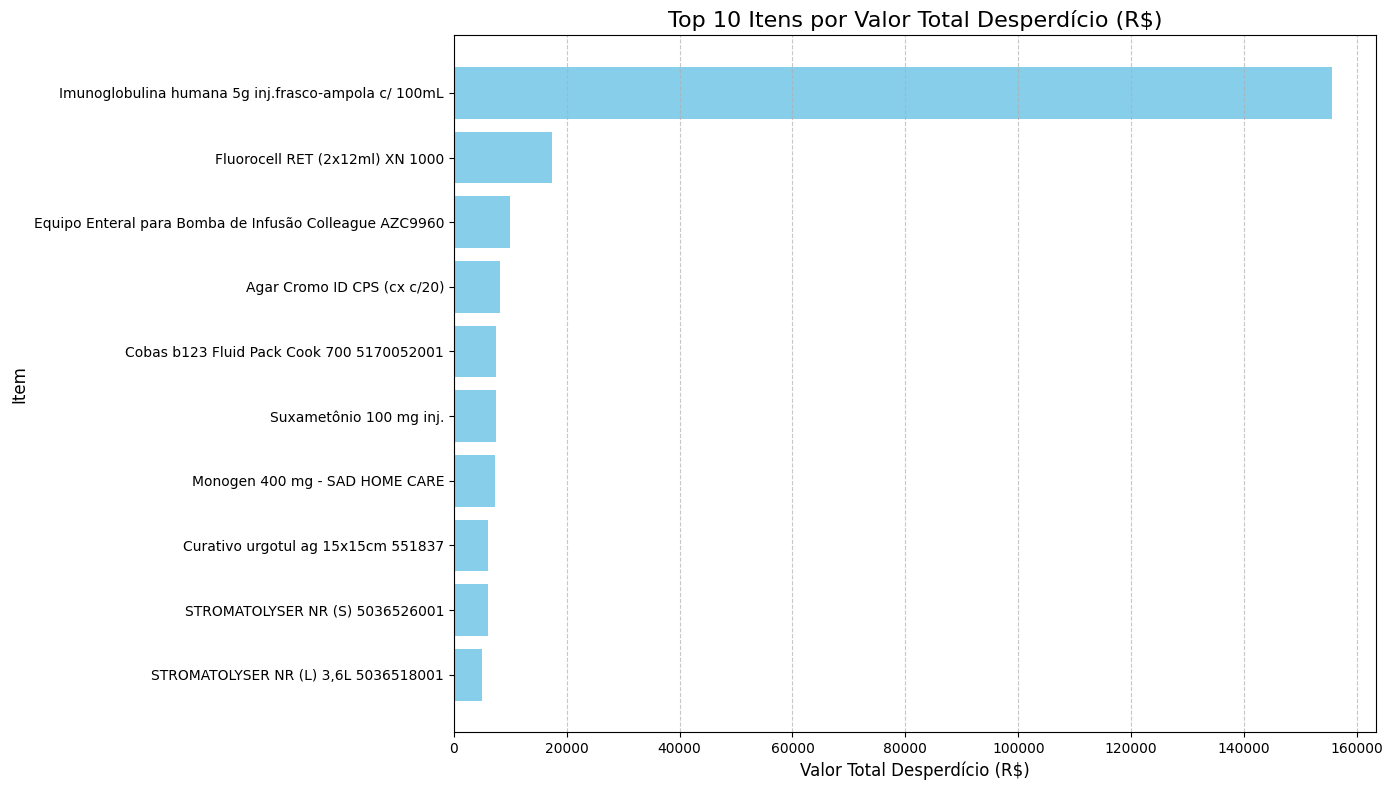

In [72]:
top_10_itens_desperdicio= df_desperdicio.groupby('ds_material_hospital')['vl_estoque'].sum().sort_values(ascending=False).head(10)
print("Dados dos 10 itens com maior valor desperdiçado:")
print(top_10_itens_desperdicio)

plt.figure(figsize=(14, 8)) # Aumentar o tamanho para melhor visualização
plt.barh(top_10_itens_desperdicio.index, top_10_itens_desperdicio.values, color='skyblue') # Usando barh do matplotlib

plt.xlabel('Valor Total Desperdício (R$)', fontsize=12)
plt.ylabel('Item', fontsize=12)
plt.title('Top 10 Itens por Valor Total Desperdício (R$)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis() # Inverter o eixo Y para que o maior valor fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Evolução mensal do desperdicio

In [73]:
desp_mes = (
    df_desperdicio.groupby(["ano", "mes"])
      .agg(vl_desp_total=("vl_estoque", "sum"),
           qt_desp_total=("qt_estoque", "sum"),
           qtd_movimentos=("vl_estoque", "count"))
)
display(desp_mes)

vl_desp_total  qt_desp_total  qtd_movimentos
ano  mes                                              
2023 1         14205.55       9908.184             350
     2         15487.20       1969.102             339
     3         32824.40       3797.391             532
     4         22527.44        814.703             278
     5        167862.91      10367.627             309
     6         11810.59       1178.313             329
     7         14319.99       1551.310             344
     8         22009.30       2541.137             559
     9         16767.79       1886.150             302
     10        17590.73       1483.629             478
     11         6181.50        701.936             287
     12        21237.45       1609.000             246
2024 1          6973.96       1275.817             369
     2         10308.64       1460.531             286
     3          9421.93        814.879             279
     4         17882.18       1110.383             284
     5          9040.63       1812.938             308
     6         14717.37        753.400             231
     7         11274.23       1525.988             311
     8         10360.36        863.871             237
     9         15535.85       1668.409             259
     10        13287.01       1420.230             283
     11        26609.15       1275.779             275
     12         7178.29        992.507             236

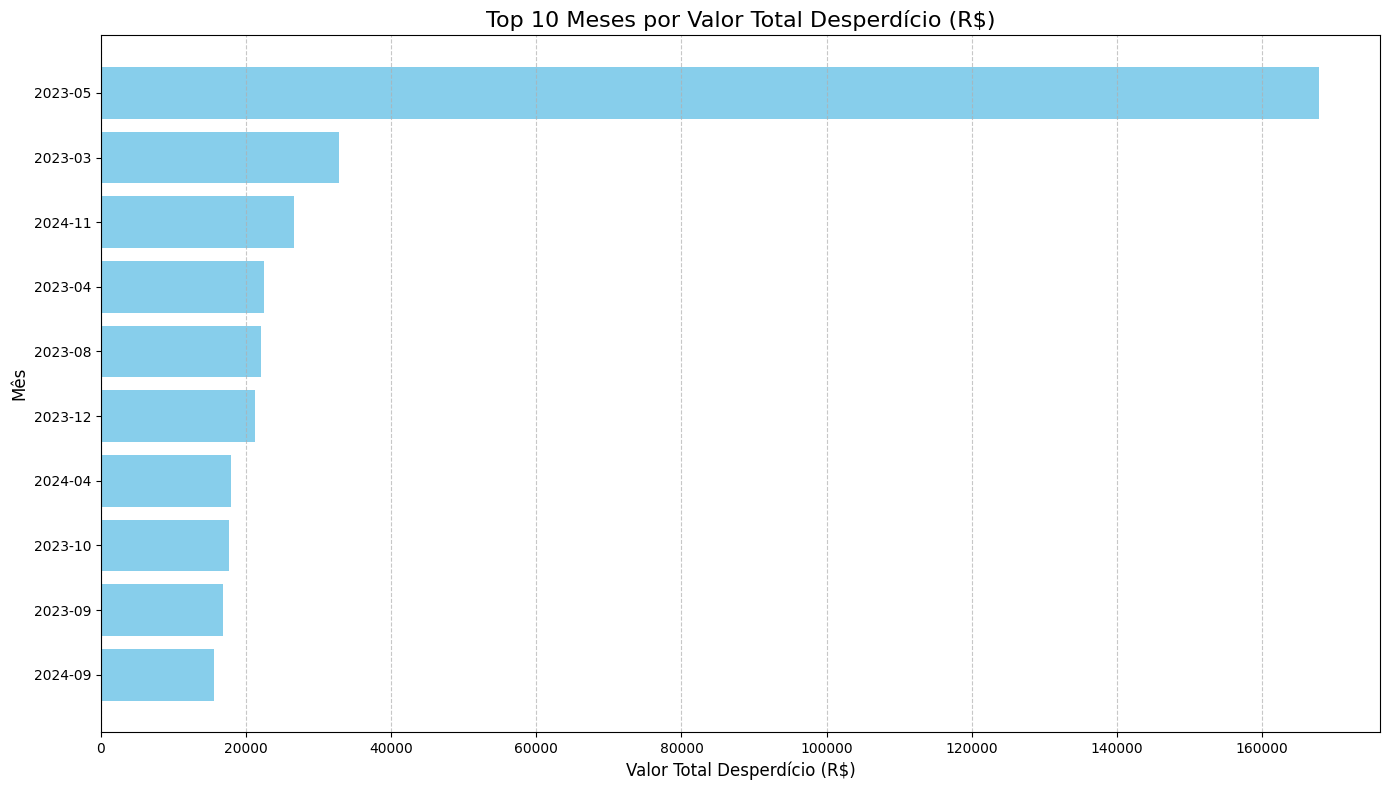

In [74]:
top_10_meses_desperdicio = df_desperdicio.groupby(['ano','mes'])['vl_estoque'].sum().sort_values(ascending=False).head(10)

# Converter o MultiIndex para uma lista de strings para o eixo Y
meses_formatados = [f'{ano}-{mes:02d}' for ano, mes in top_10_meses_desperdicio.index]

plt.figure(figsize=(14, 8))
plt.barh(meses_formatados, top_10_meses_desperdicio.values, color='skyblue')

plt.xlabel('Valor Total Desperdício (R$)', fontsize=12)
plt.ylabel('Mês', fontsize=12)
plt.title('Top 10 Meses por Valor Total Desperdício (R$)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis() # Inverter o eixo Y para que o maior valor fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4 - desperdicio total por centro de custo

In [75]:
desp_cc = (
    df_desperdicio.groupby("ds_centro_custo", observed=False)
      .agg(vl_desp_total=("vl_estoque", "sum"),
           qt_desp_total=("qt_estoque", "sum"),
           qtd_movimentos=("vl_estoque", "count"))
      .sort_values(by='vl_desp_total', ascending=False)
)
display(desp_cc)

,vl_desp_total,qt_desp_total,qtd_movimentos
ds_centro_custo,,,
FARMÁCIA CENTRAL,351741.35,29128.558,3687
Almoxarifado Laboratório,84377.12,668.000,120
FARMÁCIA SATÉLITE - CENTRO CIRÚRGICO,15015.88,1424.230,498
Microbiologia,8620.72,85.000,24
ALMOXARIFADO,7775.52,1544.000,49
...,...,...,...
TI - HGU,0.00,0.000,0
TELEFONIA,0.00,0.000,0
T.I. - TECNOLOGIA DA INFORMAÇÃO,0.00,0.000,0


/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/2913276800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_desperdicio = df_desperdicio.groupby('ds_centro_custo')['vl_estoque'].sum().sort_values(ascending=False).head(10)


Dados dos 10 Centros de Custo com maior valor desperdiçado:
ds_centro_custo
FARMÁCIA CENTRAL                        351741.35
Almoxarifado Laboratório                 84377.12
FARMÁCIA SATÉLITE - CENTRO CIRÚRGICO     15015.88
Microbiologia                             8620.72
ALMOXARIFADO                              7775.52
1º ANDAR - UNIDADE DE INTERNAÇÃO          4565.39
C.D.U CENTRO DE DIAGNÓSTICOS UNIMED       4500.30
SAD HOME CARE                             4398.20
FARMÁCIA SATELITE UNIMED 24H              4259.44
U.T.I. ADULTO                             2990.67
Name: vl_estoque, dtype: float64


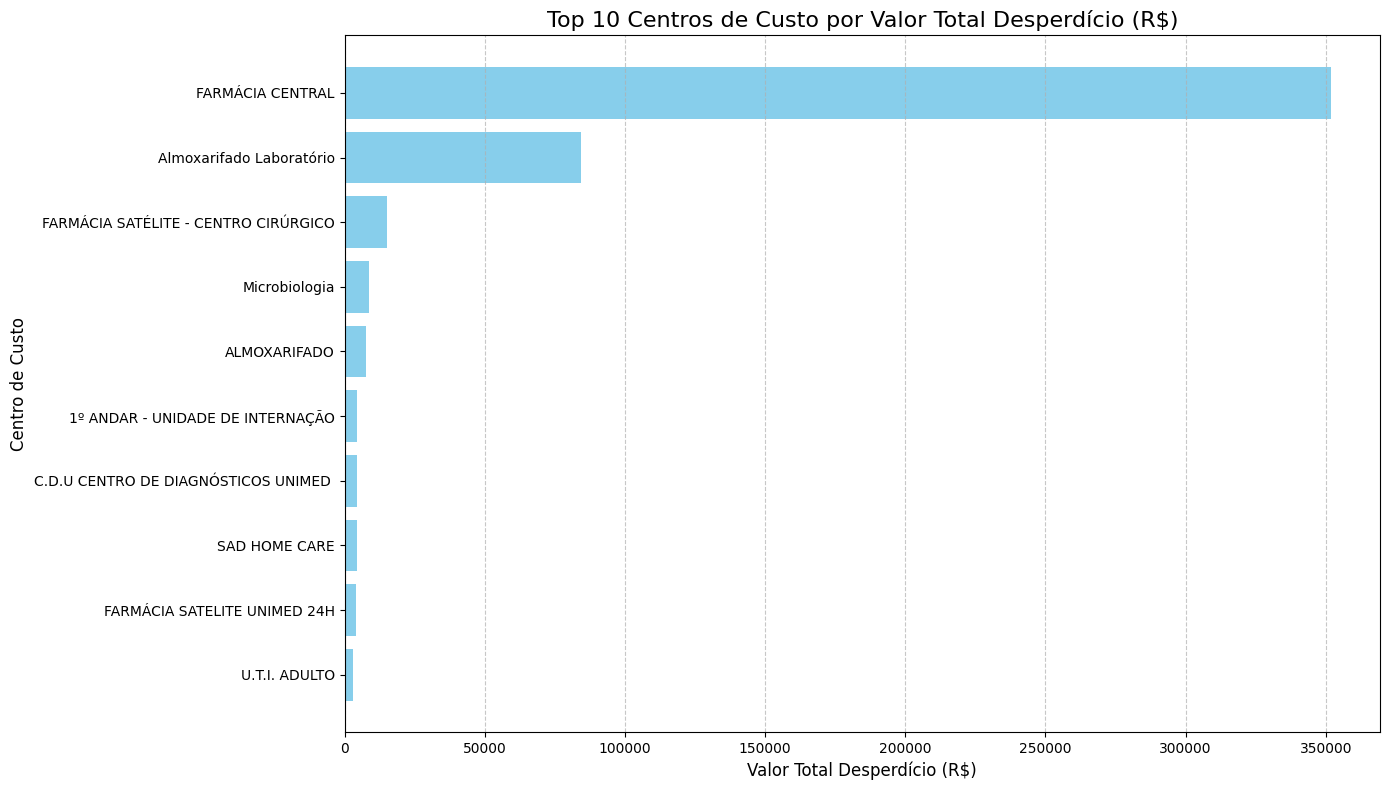

In [76]:
top_10_desperdicio = df_desperdicio.groupby('ds_centro_custo')['vl_estoque'].sum().sort_values(ascending=False).head(10)

print("Dados dos 10 Centros de Custo com maior valor desperdiçado:")
print(top_10_desperdicio)

plt.figure(figsize=(14, 8)) # Aumentar o tamanho para melhor visualização
plt.barh(top_10_desperdicio.index, top_10_desperdicio.values, color='skyblue') # Usando barh do matplotlib

plt.xlabel('Valor Total Desperdício (R$)', fontsize=12)
plt.ylabel('Centro de Custo', fontsize=12)
plt.title('Top 10 Centros de Custo por Valor Total Desperdício (R$)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis() # Inverter o eixo Y para que o maior valor fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Desperdício por tipo de operação

In [77]:
desp_tipo = (
    df_desperdicio.groupby("ds_operacao")
      .agg(vl_desp_total=("vl_estoque", "sum"),
           qt_desp_total=("qt_estoque", "sum"))
)
display(desp_tipo)

/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/1250848962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_desperdicio.groupby("ds_operacao")


,vl_desp_total,qt_desp_total
ds_operacao,,
Consumo,0.00,0.000
Devolução Paciente,0.00,0.000
Doações - saída,0.00,0.000
Execução Prescrição,0.00,0.000
Medicamentos Controlados Vencidos,1566.19,823.551
Perdas e Quebras,26627.15,7634.599
Perdas por estabilidade,2033.00,412.614
Produtos vencidos,455520.19,39684.590
Quebras e Contaminações,25749.74,3177.562


In [78]:
operacoes_desperdicio = [
    'Quebras e Contaminações',
    'Perdas e Quebras',
    'Produtos vencidos',
    'Medicamentos Controlados Vencidos',
    'Perdas por estabilidade',
    'Quebras/Contaminação Med Controlados'
]

## base final consolidada

In [79]:
df_cluster = (
    df.groupby("ds_centro_custo")
      .agg(
          desperdicio_total=("vl_estoque", "sum"),
          desperdicio_mensal_medio=("vl_estoque", "mean"),
          qtd_movimentos=("vl_estoque", "count"),
          qt_total=("qt_estoque", "sum")
      )
)

/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/3706883498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ds_centro_custo")


In [80]:
df_cluster["perc_quebras"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Perdas e Quebras").mean()
)

df_cluster["perc_perdas_estab"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Perdas por estabilidade").mean()
)

df_cluster["perc_vencidos"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Produtos vencidos").mean()
)

df_cluster["perc_med_vencidos"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Medicamentos Controlados Vencidos").mean()
)

df_cluster["perc_quebras_contamin"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Quebras e Contaminações").mean()
)

df_cluster["perc_quebras_cont_med"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
    lambda x: (x == "Quebras/Contaminação Med Controlados").mean()
)


/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/1917687874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster["perc_quebras"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/1917687874.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster["perc_perdas_estab"] = df.groupby("ds_centro_custo")["ds_operacao"].apply(
/var/folders/9l/1mkpt0ls4896tt3ksdfc_02m0000gn/T/ipykernel_22164/1917687874.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

In [81]:
display(df_cluster)

,desperdicio_total,desperdicio_mensal_medio,qtd_movimentos,qt_total,perc_quebras,perc_perdas_estab,perc_vencidos,perc_med_vencidos,perc_quebras_contamin,perc_quebras_cont_med
ds_centro_custo,,,,,,,,,,
1º ANDAR - UNIDADE DE INTERNAÇÃO,2290943.61,5.214239,439363,892152.070,0.000248,0.0,0.000039,0.0,0.000519,0.000073
2° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,636188.97,3.289651,193391,351953.933,0.000269,0.0,0.000005,0.0,0.000662,0.000047
2º ANDAR - UNIDADE DE INTERNAÇÃO,1020172.82,3.738184,272906,500252.085,0.000344,0.0,0.000040,0.0,0.000777,0.000095
2º ANDAR TORRE I - COVID,0.10,0.100000,1,1.000,0.000000,0.0,0.000000,0.0,0.000000,1.000000
3° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,2301346.12,5.978454,384940,655938.810,0.000016,0.0,0.000023,0.0,0.000260,0.000042
...,...,...,...,...,...,...,...,...,...,...
UNIDADE NEONATAL - UNIMED,39763.00,5.860427,6785,30272.991,0.000000,0.0,0.000000,0.0,0.000147,0.000000
UNIMED 24 HORAS,2178560.84,3.217535,677090,1369495.636,0.000062,0.0,0.000047,0.0,0.000576,0.000072
UTI - LONGA PERMANÊNCIA,106.47,15.210000,7,7.000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [82]:

X = StandardScaler().fit_transform(df_cluster)


In [83]:


kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(X)


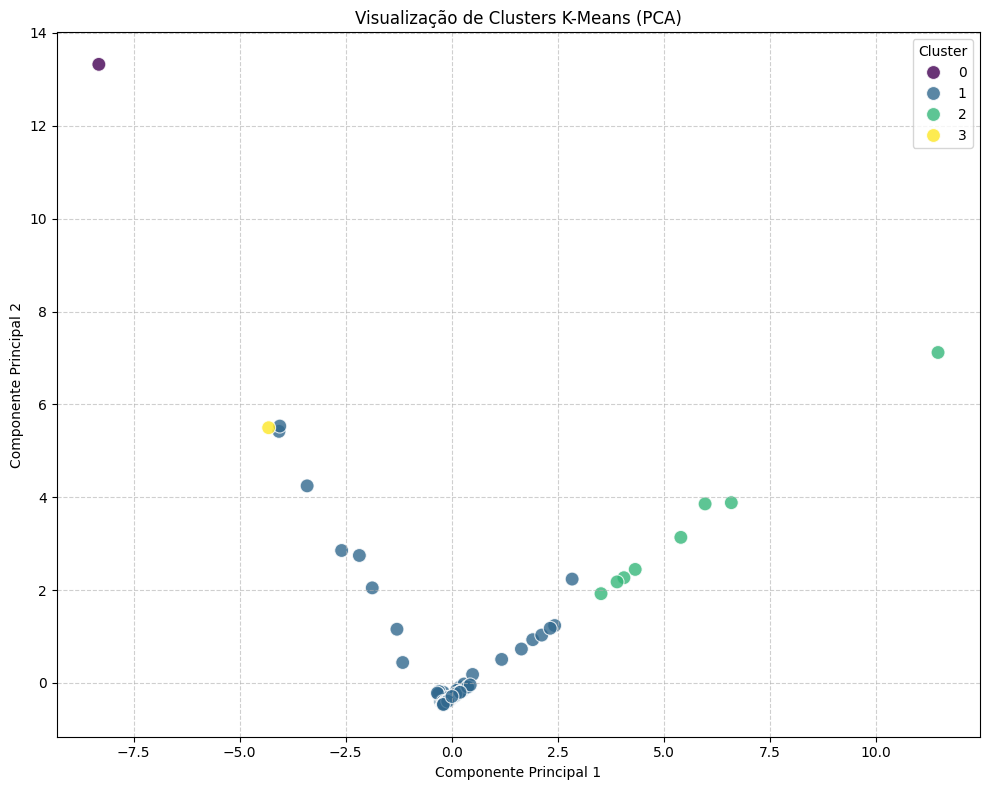

In [84]:
# Reduzir a dimensionalidade para 2 componentes usando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Criar um DataFrame para os componentes PCA e os clusters
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_cluster['cluster'].values

# Visualizar os clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
plt.title('Visualização de Clusters K-Means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [85]:
# salvando o cluster como csv
# df_cluster.to_csv('/content/drive/MyDrive/data/df_cluster.csv', index=False)